In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [ ]:
df = pd.read_csv('/content/sample_data/Cancer.csv')

In [ ]:
df.head()

,Patient Id,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,Smoking,PassiveSmoker,ChestPain,CoughingofBlood,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,High
2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient Id             1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   int64 
 3   AirPollution           1000 non-null   int64 
 4   Alcoholuse             1000 non-null   int64 
 5   DustAllergy            1000 non-null   int64 
 6   OccuPationalHazards    1000 non-null   int64 
 7   GeneticRisk            1000 non-null   int64 
 8   chronicLungDisease     1000 non-null   int64 
 9   BalancedDiet           1000 non-null   int64 
 10  Obesity                1000 non-null   int64 
 11  Smoking                1000 non-null   int64 
 12  PassiveSmoker          1000 non-null   int64 
 13  ChestPain              1000 non-null   int64 
 14  CoughingofBlood        1000 non-null   int64 
 15  Fatigue               

In [ ]:
del df['Patient Id']

In [ ]:
df['Level'].replace('Medium','High',inplace=True)

In [ ]:
df['Level'].replace('High','1',inplace=True)
df['Level'].replace('Low','0',inplace=True)

In [ ]:
df['Level'] = pd.to_numeric(df['Level'])

***SVM***

0.964


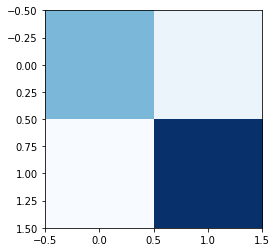

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


model = svm.SVC()

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc_S = accuracy_score(y_test, y_pred)
S=acc_S
print(acc_S)

cm = plt.imshow(confusion_matrix(y_test, y_pred),cmap = 'Blues', interpolation = 'nearest')

***Decision Tree***

Accuracy :  0.988


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


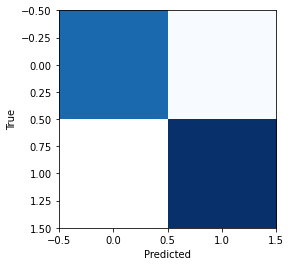

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree


X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.50,random_state=7)

clf_entropy=DecisionTreeClassifier(criterion='entropy',random_state=7)
clf_entropy.fit(X_train,y_train)

y_pred=clf_entropy.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print('Accuracy : ', acc)

import numpy as np
plt.imshow(np.log(confusion_matrix(y_test,y_pred)),cmap = 'Blues',interpolation = 'nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

**kNeighbor Classifier**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.25)

In [ ]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [ ]:
classifier.fit(X_train,y_train)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy : ', acc*100, '%')

Accuracy :  98.0 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


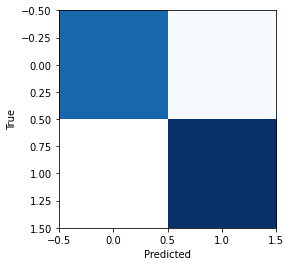

In [ ]:
plt.imshow(np.log(confusion_matrix(y_test,y_pred)),cmap = 'Blues',interpolation = 'nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

  # Accuracy Report

|   Algorithm                 |  |     accuracy_score    | 
|-----------------------------|----------------|-----------------|
|    KNN                      |    |       98.0 %       |


***Random Forest***

Accuracy score :  1.0
Accuracy :  100.0 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


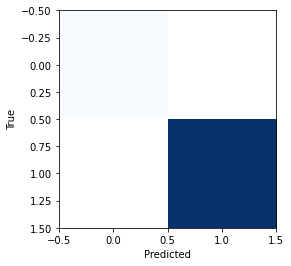

In [ ]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split

model = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model.fit(X_train,y_train)

y_pred_randomF = model.predict(X_test)
print('Accuracy score : ',accuracy_score(y_test, y_pred_randomF))
acc=accuracy_score(y_test, y_pred_randomF)
print('Accuracy : ', acc*100, '%')


plt.imshow(np.log(confusion_matrix(y_test,y_pred_randomF)),cmap = 'Blues',interpolation = 'nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()